In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
x_train = np.loadtxt(io.BytesIO(uploaded['mnist_train.csv']),delimiter=',')
mnist_tn = x_train[:,1:] # mnist_tn contains the 784 pixels of each 60000 training images
y_train = x_train[:,0].T # y_train contains labels of training dataset
x_test = np.loadtxt(io.BytesIO(uploaded['mnist_test.csv']),delimiter=',')
y_test = x_test[:,0].T  # y_test contains labels of training dataset
mnist_ts = x_test[:,1:]  # mnist_ts contains the 784 pixels of each 10000 training images

In [ ]:
print(mnist_tn.shape)
print(y_train.shape)
print(mnist_ts.shape)
print(y_test.shape)

In [ ]:
index = random.randrange(0,x_train.shape[1])
plt.imshow(mnist_tn[index].reshape(28,28), cmap = 'gray')

In [ ]:
mnist_tn = mnist_tn.reshape(len(mnist_tn),28,28,1)
y_train = y_train.reshape(len(y_train),1)
mnist_ts = mnist_ts.reshape(len(mnist_ts),28,28,1)
y_test = y_test.reshape(len(y_test),1)
mnist_tn = mnist_tn/255.0
mnist_ts = mnist_ts/255.0

In [ ]:
print(mnist_tn.shape)
print(y_train.shape)
print(mnist_ts.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [ ]:
mnist_tn[0,:]

#MODEL

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.fit(mnist_tn, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8579 - loss: 0.4600
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9832 - loss: 0.0562
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9917 - loss: 0.0282
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9927 - loss: 0.0219


In [ ]:
model.evaluate(mnist_ts, y_test, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9862 - loss: 0.0416


[0.03315218910574913, 0.9886000156402588]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction:  8.0
Actual:  8.0


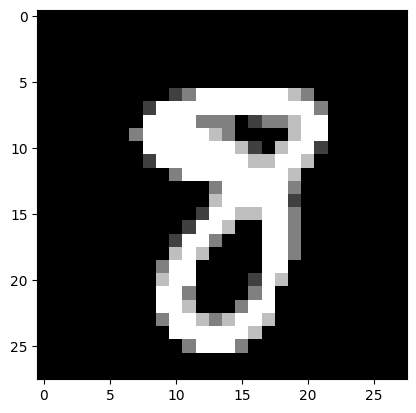

In [ ]:
index = random.randrange(0,x_train.shape[1])

#Below 5 lines are generated using ChatGPT 😢
image = mnist_ts[index]
true_label = y_test[index]

prediction = model.predict(image.reshape(1,28,28,1))  # (1,28,28,1) here first 1 shows 1 image is passed then 28 by 28 shows image size and final 1 shows only one colour grading as gray so 1
predicted_label = float(np.argmax(prediction))

plt.imshow(image.reshape(28, 28), cmap='gray')
print('Prediction: ', predicted_label)
print('Actual: ', true_label[0])